In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Fiddle with figure settings here:
plt.rcParams['figure.figsize'] = (12,10)
plt.rcParams['font.size'] = 14
plt.rcParams['image.cmap'] = 'plasma'
plt.rcParams['axes.linewidth'] = 2
# Set the default colour cycle (in case someone changes it...)
from cycler import cycler
cols = plt.get_cmap('tab10').colors
plt.rcParams['axes.prop_cycle'] = cycler(color=cols)

In [2]:
#Загрузка варианта
data = pd.read_csv('./1_variante.csv', index_col=0)

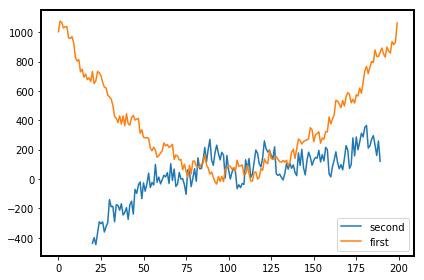

In [3]:
#Отрисовка временных рядов
plt.plot(data.index, data['second'])
plt.plot(data.index, data['first'])
plt.legend(['second', 'first'])
plt.tight_layout()

In [4]:
np.array(data)

array([[ 1.00395122e+03,             nan],
       [ 1.07637393e+03,             nan],
       [ 1.06506508e+03,             nan],
       [ 1.02895681e+03,             nan],
       [ 1.03825744e+03,             nan],
       [ 1.03760681e+03,             nan],
       [ 9.61908396e+02,             nan],
       [ 9.58548259e+02,             nan],
       [ 9.70901341e+02,             nan],
       [ 9.25965133e+02,             nan],
       [ 8.30193460e+02,             nan],
       [ 8.03303586e+02,             nan],
       [ 8.14441388e+02,             nan],
       [ 7.30186843e+02,             nan],
       [ 7.48176787e+02,             nan],
       [ 6.94297828e+02,             nan],
       [ 7.15116163e+02,             nan],
       [ 6.77719681e+02,             nan],
       [ 6.88996154e+02,             nan],
       [ 6.65053295e+02,             nan],
       [ 7.32521706e+02, -4.37025182e+02],
       [ 6.50482562e+02, -3.99257703e+02],
       [ 6.69305408e+02, -4.46768307e+02],
       [ 7.

In [5]:
#нормализация
data = (data - data.mean()) / (data.var())**0.5

In [6]:
#проверка нормализации
print(data.var())
print(data.mean())

first     1.0
second    1.0
dtype: float64
first     2.109424e-16
second   -6.693992e-17
dtype: float64


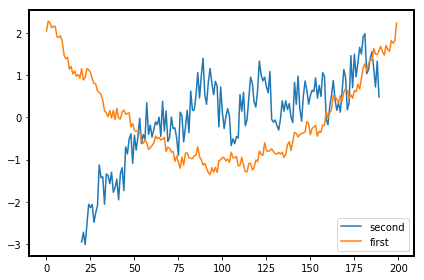

In [69]:
plt.plot(data.index, data['second'])
plt.plot(data.index, data['first'])
plt.legend(['second', 'first'])
plt.tight_layout()

In [7]:
F = [list(data['first'].dropna()), list(data['second'].dropna())]

In [8]:
#Построение траекторной матрицы
L = 70
N = [len(data['first'].dropna()), len(data['second'].dropna())]
K = np.array(N) - L + 1
X_1 = np.column_stack([F[0][i:i+L] for i in range(0,K[0])])
X_2 = np.column_stack([F[1][i:i+L] for i in range(0,K[1])])
X = np.column_stack([X_1, X_2])

In [9]:
#Проверка правильности построения матрицы
assert X.shape == (70, sum(K))

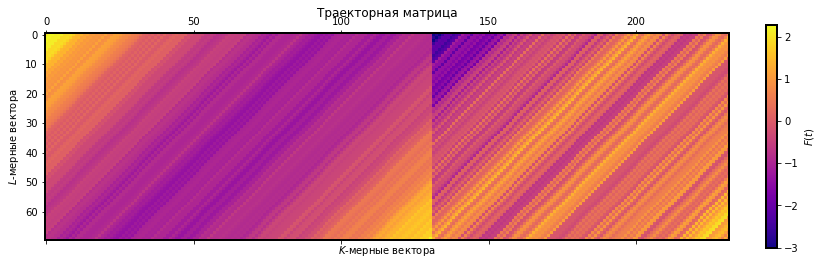

In [10]:
#Нарисовать матрицу
ax = plt.matshow(X)
plt.xlabel("$K$-мерные вектора")
plt.ylabel("$L$-мерные вектора")
plt.colorbar(ax.colorbar, fraction=0.025)
ax.colorbar.set_label("$F(t)$")
plt.title("Траекторная матрица");

In [11]:
#Найти ранг матрицы
r = np.linalg.matrix_rank(X)
r

70

In [12]:
#svd возвращает уже оттранспортированную матрицу V поэтому трансопонируем ее
# чтоб совпадало с выкладками
U, Sigma, V = np.linalg.svd(X)
V = V.T

In [13]:
#Вычислить X_elem заметим что sigma  в svd это одномерный вектор
#а не матрица

X_elem = np.array([Sigma[i] * np.outer(U[:,i], V[:,i]) for i in range(0,r)])
X_elem.shape

(70, 70, 232)

In [14]:
#проверка
if not np.allclose(X, X_elem.sum(axis=0), atol=1e-10):
    print("WARNING: The sum of X's elementary matrices is not equal to X!")

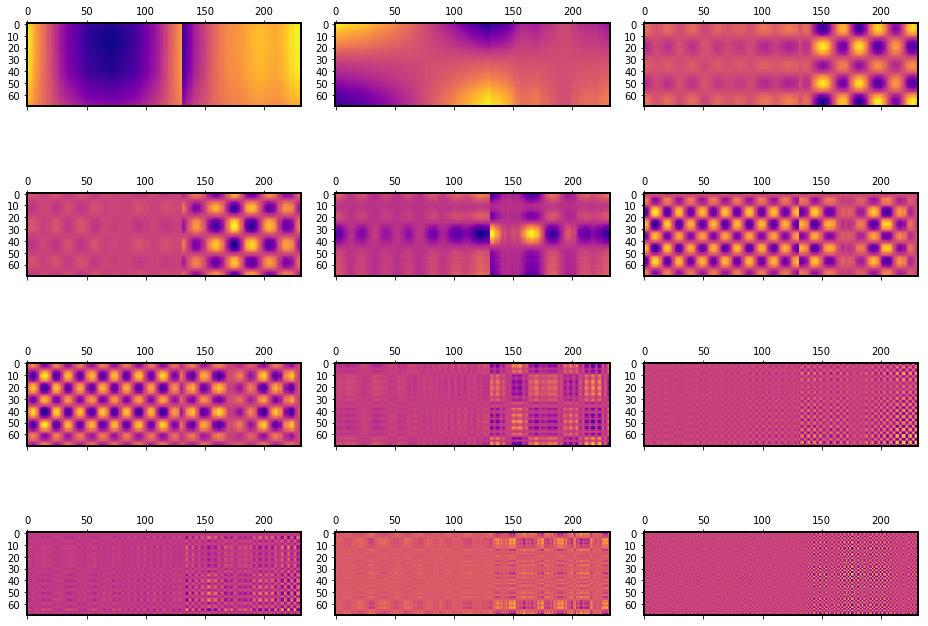

In [15]:
# In case d is less than 12 for the toy series.
#Say, if we were to exclude the noise component...
plt.figure(figsize=(13,10))
for i in range(min(12, r)):
    ax = plt.subplot(4,3,i+1)
    matrix_name = "$\mathbf{X}_{" + str(i) + "}$"
    ax.matshow(X_elem[i])
plt.tight_layout()

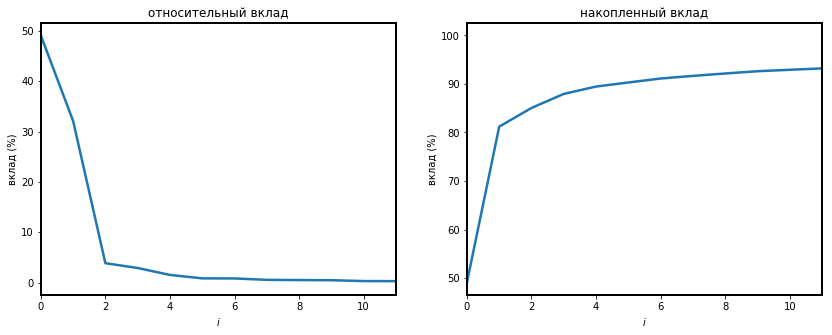

In [16]:
#нарисовать график sigma
sigma_sumsq = (Sigma**2).sum()
fig, ax = plt.subplots(1, 2, figsize=(14,5))
ax[0].plot(Sigma**2 / sigma_sumsq * 100, lw=2.5)
ax[0].set_xlim(0,11)
ax[0].set_title("относительный вклад")
ax[0].set_xlabel("$i$")
ax[0].set_ylabel("вклад (%)")
ax[1].plot((Sigma**2).cumsum() / sigma_sumsq * 100, lw=2.5)
ax[1].set_xlim(0,11)
ax[1].set_title("накопленный вклад")
ax[1].set_xlabel("$i$")
ax[1].set_ylabel("вклад (%)");

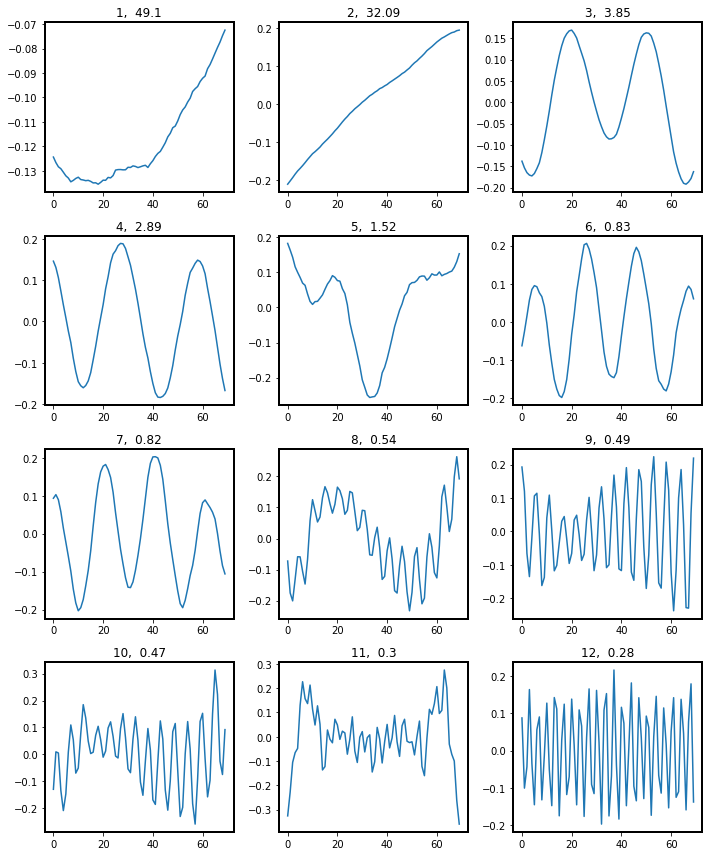

In [31]:
plt.figure(figsize=(10,12))
for i in range(min(12, r)):
    plt.subplot(4,3,i+1)
    plt.plot(U[:,i])
    plt.title(f"{i+1},  {round((Sigma**2 / sigma_sumsq * 100)[i],2)}")
plt.tight_layout()

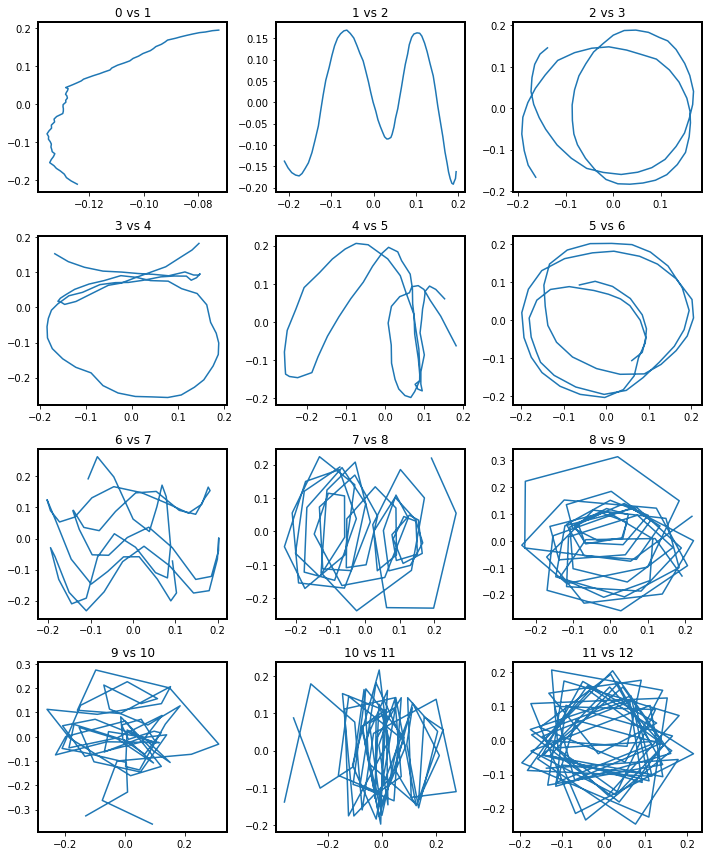

In [30]:
#Нарисовать пары векторов
plt.figure(figsize=(10,12))
for i in range(min(12, r)):
    plt.subplot(4,3,i+1)
    plt.plot(U[:,i], U[:,i+1])
    plt.title(f"{i} vs {i+1}")
plt.tight_layout()

In [48]:
#сгруппируем
trend = [0, 1]
periodic1 = [2,3,4]
periodic2 = [6,7]
periodic3 = [8,9,10,11]

In [49]:
#Суммируем сгруппированные матрицы
X_trend = sum([X_elem[i] for i in trend])
X_per1 = sum([X_elem[i] for i in periodic1])
X_per2 = sum([X_elem[i] for i in periodic2])
X_per3 = sum([X_elem[i] for i in periodic3])

In [50]:
def anti_diag_average(X):
    X_fliped = X[::, ::-1]
    anti_diag = [np.diag(X_fliped, i)\
             for i in range(1-min(X_fliped.shape), max(X_fliped.shape))]
    means = list(map(np.mean, anti_diag))[::-1]
    return np.column_stack([means[i:i+X.shape[0]] for i in range(X.shape[1])])

In [51]:
def hankelize(X, K):
    splited = [anti_diag_average(i) for i in np.split(X, [K[0]], axis=1)]
    return np.column_stack(splited)

In [53]:
#ганкелезуем группы
X_hank_trend = hankelize(X_trend, K)
X_hank_per1 = hankelize(X_per1, K)
X_hank_per2 = hankelize(X_per2, K)
X_hank_per3 = hankelize(X_per3, K)

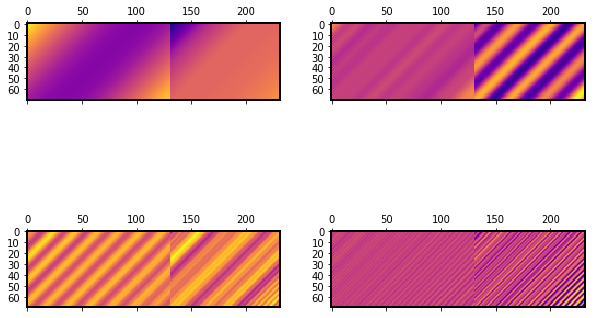

In [56]:
#нарисуем ганкелевы матрицы
plt.figure(figsize=(10,7))
ax = plt.subplot(2,2,1)
ax.matshow(X_hank_trend)
ax = plt.subplot(2,2,2)
ax.matshow(X_hank_per1)
ax = plt.subplot(2,2,3)
ax.matshow(X_hank_per2)
ax = plt.subplot(2,2,4)
ax.matshow(X_hank_per3)

In [57]:
def to_timeseries(X, K):
    return [np.append(i[0], i[:,-1][1:]) for i in np.split(X, [K[0]], axis=1)]

In [61]:
data['second']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20    -2.954040
21    -2.721712
22    -3.013975
23    -2.524163
24    -2.058670
25    -2.137817
26    -2.063585
27    -2.485349
28    -2.259129
29    -2.092082
         ...   
170    0.943209
171    0.180190
172    0.339340
173    1.461662
174    0.705128
175    1.496846
176    0.961155
177    1.288898
178    1.656757
179    1.501497
180    1.905073
181    1.981713
182    1.032667
183    1.122545
184    1.403200
185    1.551934
186    1.162401
187    0.721315
188    1.331563
189    0.480798
190         NaN
191         NaN
192         NaN
193         NaN
194         NaN
195         NaN
196         NaN
197         NaN
198         NaN
199         NaN
Name: second, Length: 20

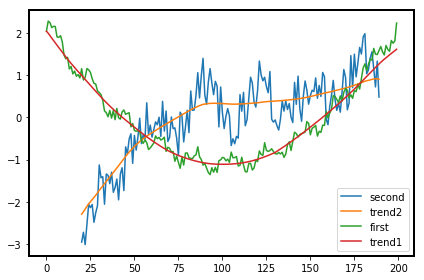

In [64]:
f1 , f2 = to_timeseries(X_hank_trend, K)

plt.plot(data.index, data['second'])
plt.plot(np.arange(20,190), trend2)
plt.plot(data.index, data['first'])
plt.plot(trend1)
plt.legend(['second', 'trend2', 'first', 'trend1'])
plt.tight_layout()

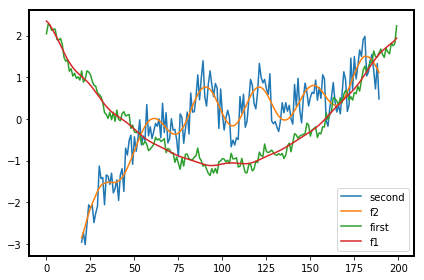

In [65]:
per1 = to_timeseries(X_hank_per1, K)

f1 = f1 + per1[0]
f2 = f2 + per1[1]

plt.plot(data.index, data['second'])
plt.plot(np.arange(20,190), f2)
plt.plot(data.index, data['first'])
plt.plot(f1)
plt.legend(['second', 'f2', 'first', 'f1'])
plt.tight_layout()

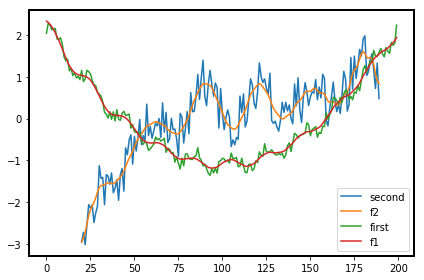

In [66]:
per2 = to_timeseries(X_hank_per2, K)

f1 = f1 + per2[0]
f2 = f2 + per2[1]

plt.plot(data.index, data['second'])
plt.plot(np.arange(20,190), f2)
plt.plot(data.index, data['first'])
plt.plot(f1)
plt.legend(['second', 'f2', 'first', 'f1'])
plt.tight_layout()

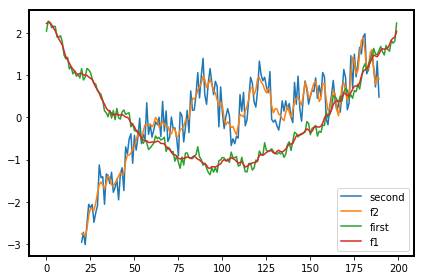

In [68]:
per3 = to_timeseries(X_hank_per3, K)

f1 = f1 + per3[0]
f2 = f2 + per3[1]

plt.plot(data.index, data['second'])
plt.plot(np.arange(20,190), f2)
plt.plot(data.index, data['first'])
plt.plot(f1)
plt.legend(['second', 'f2', 'first', 'f1'])
plt.tight_layout()